In [17]:
from langgraph.graph import StateGraph,START, END
from typing import TypedDict,Literal

In [18]:
# define State

class BMIState(TypedDict):
    weight : float
    height : float
    bmi : float
    verdict : Literal['fit','underweight','overweight']
    

In [19]:
# Calculate BMI function

def calculate_bmi(state : BMIState) -> BMIState:
    height = state['height']
    weight = state['weight']
    
    bmi = weight / (height ** 2)
    state['bmi'] = round(bmi,2)
    
    return state
    

In [31]:
# BMI classification

def give_verdict(state: BMIState) -> BMIState:
    bmi = state['bmi']
    
    if bmi < 18.5:
        verdict = 'underweight'
    elif bmi > 30:
        verdict = 'overweight'
    else:
        verdict = 'fit'
        
    state['verdict'] = verdict
    
    return state



In [32]:
#define your graph
graph = StateGraph(BMIState)

# add nodes 
graph.add_node('calculate_bmi',calculate_bmi)
graph.add_node('give_verdict',give_verdict)

# add edges
graph.add_edge(START,'calculate_bmi')
graph.add_edge('calculate_bmi','give_verdict')
graph.add_edge('give_verdict',END)

# compile graph
workflow = graph.compile()



In [33]:
#Initial State
initial_state = {'height':1.73,'weight':70}

# execute graph
output = workflow.invoke(initial_state)

In [34]:
output

{'weight': 70, 'height': 1.73, 'bmi': 23.39, 'verdict': 'fit'}

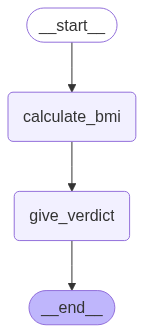

In [35]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())